# Regresión lineal polinómica
Oscar Oswaldo Estrada Morales<br>
Inteligencia Artificial<br>
Ingeniería Bioinformática

In [184]:
#Librerias
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os

### Task 1.1

In [185]:
#Carga del archivo
data = np.genfromtxt("/content/kc_house_data.csv", delimiter=",", skip_header=1, dtype=float)

#Seteo de variables 
y = data[:, 2] #Price
x = data[:, 5] #sqft_living

### Task 1.2

In [186]:
DATASET_SET_SIZE = x.shape[0]
DATASET_X_LIM = np.max(x)

In [187]:
#Creacion de funciones de costo y gradiente
cost = lambda X, y, t: ((X @ t - y) ** 2).sum() / len(y)
grad = lambda X, y, t: 2 * X.T @ (X @ t - y) / len(y)

In [188]:
#Creamos nuestra funcion de regresion lineal 
def linreg(X, y, t, cost,  grad, a=0.1, n = 100):
    costs = []
    for i in range(n):
        t -= a * grad(X,y,t)
        costs.append(cost(X,y,t))
    
    return t, costs

In [189]:
#Ajustamos los shapes de los arrays y los stackeamos a np.ones
X = x.reshape(DATASET_SET_SIZE, 1)
Xr = np.hstack((
    np.ones((DATASET_SET_SIZE, 1)),
    X)
)
y = y.reshape(DATASET_SET_SIZE, 1)

### Task 1.3

In [190]:
#Ejecutamos el modelo 
to = np.random.rand(Xr.shape[1], 1)

tf, costs = linreg(Xr, y, to, cost, grad, a = 0.0000001, n =10000)
print("TF (Theta resultante): ", tf)

TF (Theta resultante):  [[-13.95192593]
 [263.09480234]]


In [191]:
#Linea de tendencia
xm = np.array([[0], [DATASET_X_LIM]])
xmr = np.hstack((
    np.ones((2, 1)),
    xm)
)
ym = (xmr @ tf)

<ipython-input-192-9f0f78a463a8>:2: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  plt.plot(X, y, "ro", color = "pink")


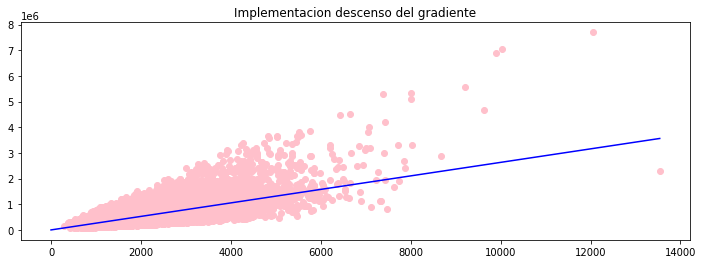

In [192]:
#Graficamos
plt.plot(X, y, "ro", color = "pink")
plt.plot(xm, ym, color = "blue")
plt.title('Implementacion descenso del gradiente')
plt.show()

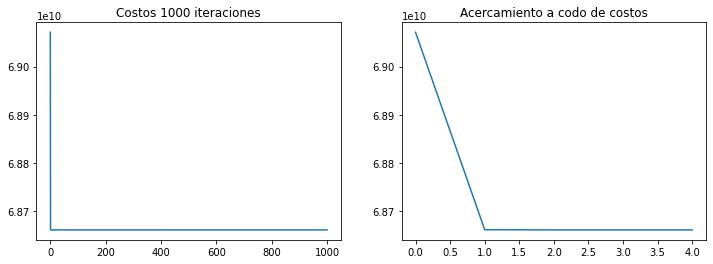

In [193]:
#Grafica de costos y acercamiento para ubicar el codo de iteraciones
plt.subplot(1, 2, 1)
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(np.arange(1000), costs[:1000])
plt.title('Costos 1000 iteraciones')

plt.subplot(1, 2, 2)
plt.rcParams['figure.figsize'] = [12, 4]
plt.plot(np.arange(5), costs[:5])
plt.title('Acercamiento a codo de costos')


plt.show()

### Task 1.4

### Task 1.5

Tras haber realizado la implementación vectorial del algoritmo de regresión lineal, podemos ver que la gráfica si muestra 